# World Marathon Majors

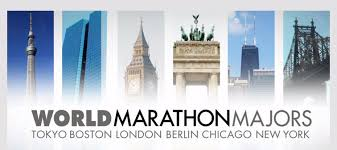

**The Abbott World Marathon Majors is a series consisting of six of the largest and most renowned marathons in the world. The races take place in Tokyo, Boston, London, Berlin, Chicago and New York City.
**

# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [ ]:
data=pd.read_csv('../input/world-marathons-majors/world_marathon_majors.csv',encoding='latin1')

# Having A look At The Data

In [ ]:
data.head()

In [ ]:
data.sort_values('year')
xx=data.groupby('year').min()

In [ ]:
xx

# Let's Look At Winning Countries in Different Years

In [ ]:
x=data.groupby('country').count()

In [ ]:

fig = go.Figure(data=go.Choropleth(
    locations=list(x.index), # Spatial coordinates
    z = x['winner'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total Number",
))

fig.update_layout(
    title_text = 'World Marathon Majors',
    geo_scope='world', # limite map scope to USA
)

fig.show()

**Conclusion of this plot :**

In this plot we can see the number of amount of medals won by the countries in marathon over the years and we can observe and see that the maximum amount of the medals were obtained by Kenya 136 followed by The United States .

# Let's see world distribution of medals over the years

In [ ]:
p=sorted(list(data.year.unique()))
data_slider=[]

for year in p:
    df=data[data['year']==year]
    x=df.groupby('country').count()
    data_one_year = dict(
                    type='choropleth',
                    locations = list(x.index),
                    z=x['winner'].astype(float),
                    locationmode='country names',
                    text = x['winner']
                    )
    data_slider.append(data_one_year)
steps = []

for i in range(121):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1897)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

layout = dict(geo=dict(scope='world'),
              sliders=sliders)


	
# I create the figure object:

fig = dict(data=data_slider, layout=layout) 



	
# to plot in the notebook

plotly.offline.iplot(fig)

Conclusion of the plot:

From this plot we can clearly see the parts of the world that won the marathon in the respective year on the slider :)

# Box plot of the time finished by the winner 

In [ ]:
px.box(data_frame=data.sort_values('time'),y='time',color='gender')

**Conclusion of plot:**

From this plot we can see that it takes a male marathon runner about 2:10 seconds to finish a race and win it and it takes a female marathon runner about 2:25 seconds 

**Scientific Fact :** 

Men are, on average, faster than women when it comes to sprinting and marathoning. This is largely because of  their generally bigger hearts, which can deliver more fresh oxygen to the body, and to bigger stores of the sex hormone testosterone, which can make muscles bulkier and stronger.
but As ultra race distances get longer, estrogen becomes like a performance enhancer for women in a few different ways.  

# Let's have a closer look at the champion in scoring medals : Kenya 

In [ ]:
px.histogram(data_frame=data[data['country']=='Kenya'],x='year',color='gender')

We can clearly see a positive trend here which shows that the number of medals won by kenya is increasing year after year 

We can also see that the major contribution to this positive trend or better performance of kenya goes to the women of Kenya who have proved to better than others making them eligible to be a winner :)

# Star of Marathon in Kenya

In [ ]:
px.histogram(data_frame=data[data['country']=='Kenya'],x='winner',color='gender')

**For women we can see Catherine Ndereba and Mary Keitany as the stars of Kenya's marathon team**

**For men Ellut Kipchoge is the star**

# Person Who won the most amount of medals :)

In [ ]:
data.groupby(['winner','country']).count().sort_values('gender',ascending=False).head(1).index

Grete Waitz of Norway is the person to win the most amount of medals in World Marathon Majors

Grete Waitz was a Norwegian marathon runner and former world record holder. In 1979, she became the first woman in history to run the marathon in under two and a half hours. She won nine New York City Marathons, women's division, between 1978 and 1988, more than any other runner in history.

# Let's see the improvement of competition over the years

In [ ]:
female_data_grouped=data.groupby('year').min()
female_data_grouped.sort_values('time',inplace=True)
px.line(data_frame=female_data_grouped.sort_values('time'),x=female_data_grouped.index,y=['time'],labels={'value':'Time'},template='plotly_dark',color='gender')

We can clearly see that the performance of the athletes has increased over time :)

Hoping all the athletes good luck for the future :) 


# Have Fun And Give Ya All Everyone

# Thank you :)

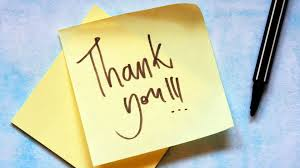